In [0]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import pandas as pd

import random
import keras
from sklearn import metrics
#!pip install peakutils
#import peakutils
from sklearn.utils import shuffle
import tensorflow as tf
from scipy.interpolate import *
from scipy.signal import *
from sklearn.model_selection import train_test_split

In [6]:
! git clone https://github.com/vishnurmurthy/Myocardial_Ischemia_Detection
!ls

large_data = pd.DataFrame({"Signal":[], "Label":[]})
large_data

datafiles = ['s20011.xz','s20131.xz','s20251.xz','s20341.xz','s20471.xz','s20591.xz','s30721.xz','s20021.xz','s20141.xz',
's20351.xz','s20481.xz','s20601.xz','s30731.xz','s20031.xz','s20151.xz','s20271.xz','s20361.xz','s20491.xz','s20621.xz',
's20272.xz','s20371.xz','s20501.xz','s20431.xz','s20551.xz','s20181.xz','s30661.xz','s20301.xz','s20231.xz','s20321.xz',
's20631.xz','s30741.xz','s20051.xz','s20171.xz','s20273.xz','s20381.xz','s20511.xz','s20641.xz','s30742.xz','s20061.xz',
's20274.xz','s20391.xz','s20521.xz','s20651.xz','s30751.xz','s20071.xz','s20191.xz','s20281.xz','s20401.xz','s20531.xz',
's30752.xz','s20081.xz','s20201.xz','s20291.xz','s20411.xz','s20541.xz','s30671.xz','s30761.xz','s20091.xz','s20211.xz',
's30681.xz','s30771.xz','s20101.xz','s20221.xz','s20311.xz','s20441.xz','s20561.xz','s30691.xz','s30781.xz','s20111.xz',
's20451.xz','s20571.xz','s30701.xz','s30791.xz','s20121.xz','s20241.xz','s20331.xz','s20461.xz','s20581.xz','s30711.xz', 
's30732.xz','s20041.xz','s20161.xz','s30801.xz', 's20261.xz',]

os.chdir('Myocardial_Ischemia_Detection/')
!ls


Cloning into 'Myocardial_Ischemia_Detection'...
remote: Counting objects: 1317, done.
remote: Compressing objects: 100% (287/287), done.
remote: Total 1317 (delta 91), reused 266 (delta 44), pack-reused 984
Receiving objects: 100% (1317/1317), 533.34 MiB | 26.17 MiB/s, done.
Resolving deltas: 100% (200/200), done.
Checking out files: 100% (621/621), done.
Myocardial_Ischemia_Detection  s20171.xz  s20311.xz  s20491.xz	s30671.xz
s20011.xz		       s20181.xz  s20321.xz  s20501.xz	s30681.xz
s20021.xz		       s20191.xz  s20331.xz  s20511.xz	s30691.xz
s20031.xz		       s20201.xz  s20341.xz  s20521.xz	s30701.xz
s20041.xz		       s20211.xz  s20351.xz  s20531.xz	s30711.xz
s20051.xz		       s20221.xz  s20361.xz  s20541.xz	s30721.xz
s20061.xz		       s20231.xz  s20371.xz  s20551.xz	s30731.xz
s20071.xz		       s20241.xz  s20381.xz  s20561.xz	s30732.xz
s20081.xz		       s20251.xz  s20391.xz  s20571.xz	s30741.xz
s20091.xz		       s20261.xz  s20401.xz  s20581.xz	s30742.xz
s20101.xz		       s20271.xz  

In [0]:
os.chdir('processed_data')
for i in range(len(datafiles)):
  dat = pd.read_pickle(datafiles[i])
  for count, signal in enumerate(dat['Signal']):
    dat['Signal'][count] = dat['Signal'][count] - np.mean(dat['Signal'][count])
    dat['Signal'][count] = dat['Signal'][count] / np.std(dat['Signal'][count])
  large_data = large_data.append(dat)
  print(datafiles[i], i, "out of", len(datafiles))
os.chdir('../..')

s20011.xz out of 84
s20131.xz out of 84
s20251.xz out of 84
s20341.xz out of 84
s20471.xz out of 84
s20591.xz out of 84
s30721.xz out of 84
s20021.xz out of 84
s20141.xz out of 84
s20351.xz out of 84


# of data rows for ST:  298287
# of data rows for RTST:  86628
# of data rows for Normal:  290985
nx 0


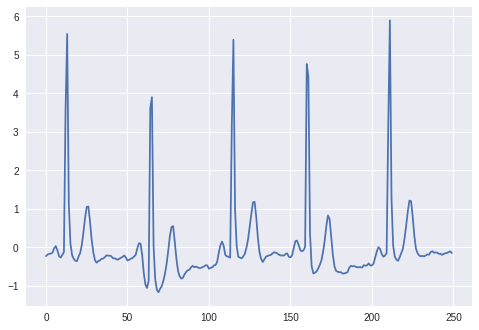

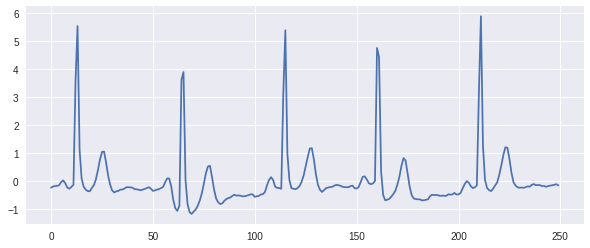

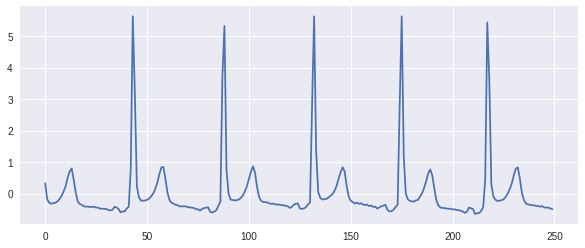

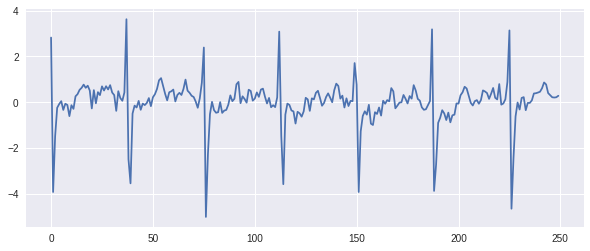

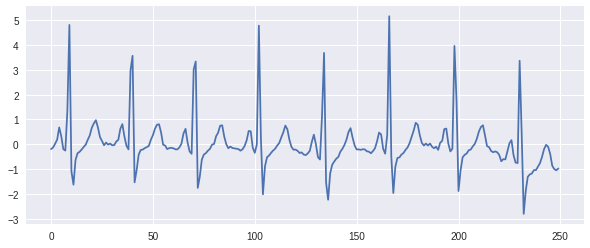

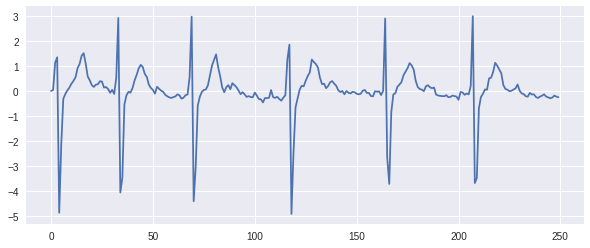

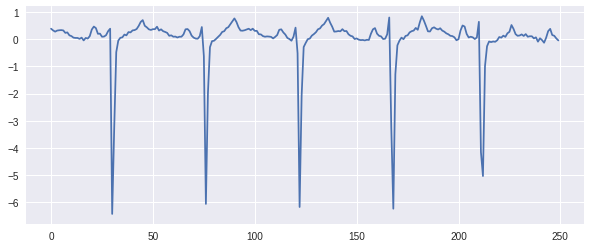

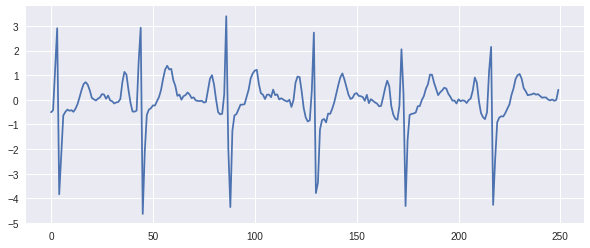

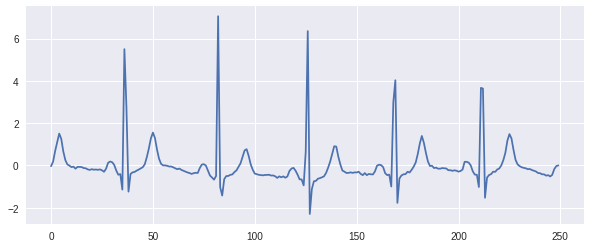

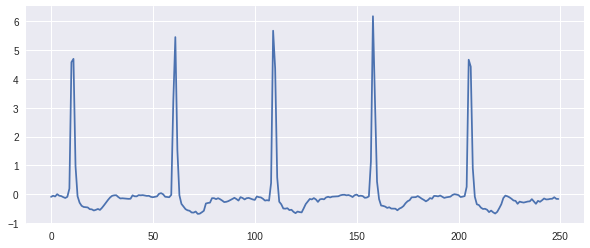

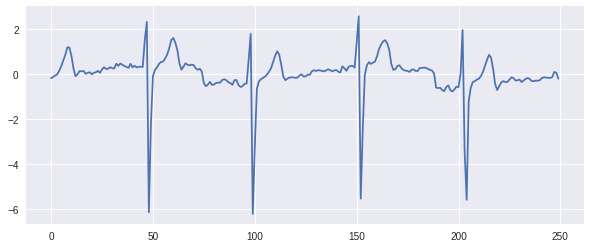

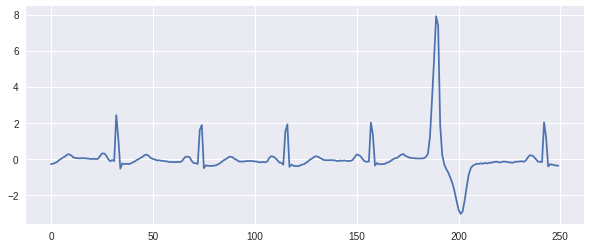

In [8]:
large_data = large_data[large_data.Label != 'scct'] #dropping rows with shifts, we are not classifying
large_data = large_data[large_data.Label != 'sst']

large_data['Label'] = large_data['Label'].map({'st': 0, 'rtst': 1, 'normal': 2})

print("# of data rows for ST: ", len(large_data.loc[large_data['Label'] == 0]))
print("# of data rows for RTST: ", len(large_data.loc[large_data['Label'] == 1]))
print("# of data rows for Normal: ", len(large_data.loc[large_data['Label'] == 2]))

newx = 0
for i in large_data['Signal']:
	if len(i)!= 250:
		print(len(i))
		newx+=1
print("nx", newx)

#convert to ints

large_data['Label'] = large_data['Label'].astype('category').cat.codes

#randomly shuffle dataframe

large_data = large_data.sample(frac=1).reset_index(drop=True)

plt.plot(np.arange(0, 250), large_data['Signal'][0])

LEN = large_data.shape[0]

for i in range(0, 676483, 67000):
    plt.figure(figsize = (10, 4))
    plt.plot(np.arange(0, 250), large_data['Signal'][i])
    plt.show()

In [9]:
y = large_data['Label'].values
X = []
for i in large_data['Signal']:
    X.append(i)
X = np.array(X)

print("Y")
print(y.shape)
print("X")
print(X.shape)

Y
(676484,)
X
(676484, 250)


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

y_train = tf.keras.utils.to_categorical(y_train, 3)
y_train = y_train.astype(np.float32)
y_val = tf.keras.utils.to_categorical(y_val, 3)
y_val = y_val.astype(np.float32)

#X_train = X_train.astype(np.float32)
#X_val = X_val.astype(np.float32)

print("Training")
print(X_train.shape, y_train.shape)
print("Validation")
print(X_val.shape, y_val.shape)

Training
(541187, 250) (541187, 3)
Validation
(135297, 250) (135297, 3)


In [16]:
model = tf.keras.models.Sequential()
'''
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape = X_train[0].shape))
model.add(tf.keras.layers.GaussianDropout(.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.GaussianDropout(.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.GaussianDropout(.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.GaussianDropout(.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
'''

model.add(tf.keras.layers.Conv1D(filters=18, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(tf.keras.layers.MaxPooling1D(3, strides=23))
model.add(tf.keras.layers.Conv1D(16, 6, activation = 'relu', padding = 'valid'))
model.add(tf.keras.layers.MaxPooling1D(3, strides=23))
model.add(tf.keras.layers.Dropout(.25))
model.add(tf.keras.layers.Conv1D(16, 6, activation = 'relu', padding = 'valid'))
model.add(tf.keras.layers.MaxPooling1D(2, strides=2))
model.add(tf.keras.layers.Dropout(.25))
model.add(tf.keras.layers.Conv1D(16, 6, activation = 'relu', padding = 'valid'))
model.add(tf.keras.layers.MaxPooling1D(2, strides=2))
model.add(tf.keras.layers.Dropout(.25))


model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(.25))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(.25))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(.25))
  
  
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.train.AdamOptimizer(learning_rate=0.001), metrics=['accuracy'])
model.summary()


ValueError: ignored

In [0]:
print(X_train[0].shape)

(250,)


In [0]:
################################################################
############## RUN ONLY FOR CONVOLUTION 1D MODELS ##############
################################################################

X_train = X_train.reshape(len(X_train), X_train[0].shape[0], 1)
X_val = X_val.reshape(len(X_val), X_val[0].shape[0], 1)

################################################################
############## RUN ONLY FOR CONVOLUTION 1D MODELS ##############
################################################################

In [0]:
model.fit(X_train, y_train, validation_data = (X_val, y_val), verbose = True, epochs=5)

In [0]:
test_pred = pd.DataFrame(model.predict(X_val))
test_predict = test_pred.idxmax(axis=1)
test_labels = [ np.where(label==1)[0][0] for label in y_val]
test_labels_one_hot = pd.DataFrame(y_val)
test_pred.head(5)

,0,1,2
0,0.544149,0.115061,0.340789
1,0.000778,0.955360,0.043863
2,0.420025,0.083433,0.496542
3,0.567776,0.107429,0.324794
4,0.897892,0.012563,0.089546


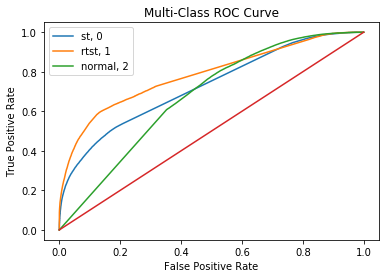

In [0]:
fpr = {}
tpr = {}
roc_auc = {}
stage_dict = ['st', 'rtst', 'normal']
for i in range(3):
    fpr[i], tpr[i], _ = metrics.roc_curve(test_labels_one_hot.iloc[:, i], test_pred.iloc[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label = stage_dict[i] + ', ' + str(i))
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend()
plt.show()

fpr["micro"], tpr["micro"], _ = metrics.roc_curve(test_labels_one_hot.values.ravel(), test_pred.values.ravel())
roc_auc = metrics.auc(fpr["micro"], tpr["micro"])

ROC:  0.7886724722327327
ACC:  0.5959777378655846
[[0.22861556 0.00241691 0.20703342]
 [0.02090216 0.0337258  0.07545622]
 [0.08622512 0.01198844 0.33363637]]


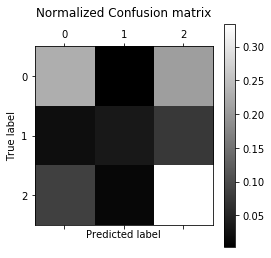

[[30931   327 28011]
 [ 2828  4563 10209]
 [11666  1622 45140]]


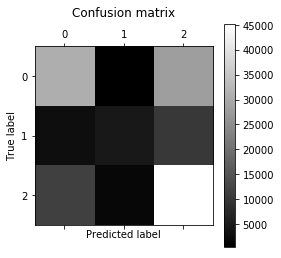

In [0]:
print("ROC: ", roc_auc)
print("ACC: ", metrics.accuracy_score(test_labels, test_predict))
cm = metrics.confusion_matrix(test_labels, test_predict)

'''
ROC:  0.8388993698385805
ACC:  0.6494009475450305
'''

print(cm/len(test_labels))
# Show confusion matrix in a separate window
plt.matshow(cm/len(test_labels), cmap='gray')

plt.title('Normalized Confusion matrix\n')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(cm)

plt.matshow(cm, cmap='gray')

plt.title('Confusion matrix\n')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
#Save the model

model.save("BWSI2018.h5")

#Delete existing model

#del model

#Load the model

#model = load_model('my_model.h5')